<a href="https://colab.research.google.com/github/SadeenAlsabbagh/Computational_Physics/blob/main/Copy_of_Starting_Point_for_Homework_Solving_Laplace's_Equation_in_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import time

## The 2D Laplace Equation

Remember Poisson's Equation:
\begin{eqnarray}
\frac{\partial^2 V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2} + \frac{\partial^2 V}{\partial z^2}  &=& -\frac{\rho} {\varepsilon_o}
\end{eqnarray}
and Laplace's Equation (i.e. Poisson's Equation in a vacuum.)
\begin{eqnarray}
    \frac{\partial^2 V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2} + \frac{\partial^2 V}{\partial z^2}  &=& 0
\end{eqnarray}
Previously, we had considered a capacitor, where $V$ only depends on one variable, $x$.

Now, let's consider $V=V(x,y)$, so the equation we need to solve is
\begin{eqnarray}
    \frac{\partial^2 V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2}   &=& 0
\end{eqnarray}

# The Method of Relaxation in 2 Dimensions

Previously, we found a numerical approximation to $\frac{d^2V}{dx^2}$:


Modifying this to add the y dimension:  
\begin{eqnarray}
\left.\frac{\partial^2V}{\partial^2x}\right|_{(x,y)} &\approx& \frac{V(x+2h,y)-2V(x,y)+V(x-2h,y)}{4h^2}\\
\end{eqnarray}
where, because $V$ depends, not just on $x$, but on $y$, we need to write the x derivative as a partial derivative.

For simplicity's sake, let's make the spacing in the grid in the y direction the same as in the y direction, $h$. This gives us
\begin{eqnarray}
\left.\frac{\partial^2V}{\partial^2y}\right|_{(x,y)} &\approx& \frac{V(x,y+2h)-2V(x,y)+V(x,y-2h)}{4h^2}\\
\end{eqnarray}

In two dimensions, Laplace's equation says that $\frac{\partial^2 V}{\partial x^2}+\frac{\partial^2 V}{\partial y^2}=0$, so
\begin{eqnarray}
0 &=& \frac{V(x+2h,y)-2V(x,y)+V(x-2h,y)}{4h^2}+ \frac{V(x,y+2h)-2V(x,y)+V(x,y-2h)}{4h^2}\\
 - \frac{V(x,y+2h)-2V(x,y)+V(x,y-2h)}{4h^2}&=&\frac{V(x+2h,y)-2V(x,y)+V(x-2h,y)}{4h^2}\\  
 - [V(x,y+2h)-2V(x,y)+V(x,y-2h)] &=& V(x+2h,y)-2V(x,y)+V(x-2h,y)\\
- V(x,y+2h)+2V(x,y)-V(x,y-2h)&=& V(x+2h,y)-2V(x,y)+V(x-2h,y) \\
4V(x,y)&=& V(x+2h,y)+V(x-2h,y) + V(x,y+2h)+ V(x,y-2h)\\
V(x,y)&=& \frac{1}{4}[V(x+2h,y)+V(x-2h,y) + V(x,y+2h)+ V(x,y-2h)]
\end{eqnarray}

And as with the 1D equation, it doesn't really matter if we consider the cell spacing to be $h$  or $2h$ or $\frac{h}{2}$, so:
\begin{eqnarray}
V(x,y)&=& \frac{1}{4}[V(x+h,y)+V(x-h,y) + V(x,y+h)+ V(x,y-h)]
\end{eqnarray}

We will now have a two-dimensional potential, `V[i,j]`.

We could begin by looping through `i` and `j` as we did with the 1D problem (double the for loops, double the fun!) but instead let's move directly to using the array manipulation technique we worked out... but in 2D.


# The Numerical Solution of the 2D Laplace Equation

Begin by setting up your first-guess array of V.  

In two dimensions, we will need more boundary conditions.  

We also have to make sure the boundary conditions are *continuous*, i.e. there cannot be a jump in the value of V between, e.g. V(0,0) and V(0,0.1).


Let's start with
$V(x,0)=\frac{V_0}{a} x$

What should the boundary conditions along the other sides of the array be?  Can we set any sides to 0? If so, which one(s)?

In [ ]:
m, n = (5, 5) # These are integers

a=1.

V0=1.

x = np.linspace(0., a, m)

y = np.linspace(0., a, n)

xv, yv = np.meshgrid(x, y)


# print("x: ",x)
# print("y: ",x)
# print()
# print("xv")
# print(xv)
# print("yv")
# print(yv)

# print("(",xv[1,3],yv[1,3],")")

V=np.zeros_like(xv)

V[:,-1]=V0-V0*yv[:,-1]/a

V[0,:]=V0*xv[0,:]/a

# print("V")
# print(V)

And graph it!

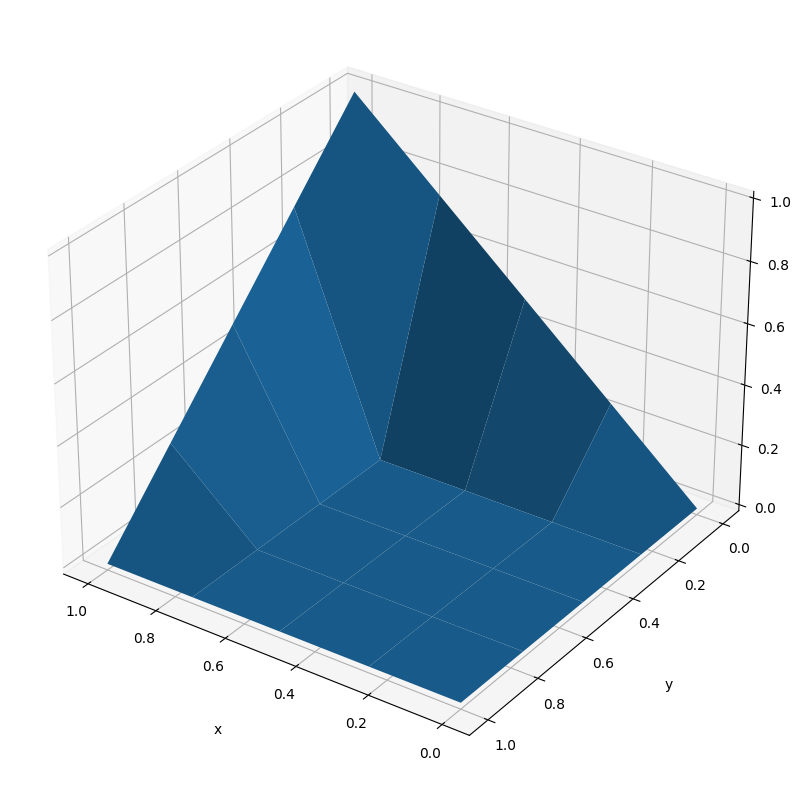

In [ ]:

fig = plt.figure(figsize = (15,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(xv, yv, V)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('V', labelpad=20)
ax.view_init(30,125)

plt.show()

# Relaxation Function


In [ ]:
def boundary(original,new):
  # Replace boundary conditions in array `new` with the boundary conditions in the original array.
  new[0,:]=original[0,:]
  new[-1,:]=original[-1,:]
  new[:,0]=original[:,0]
  new[:,-1]=original[:,-1]
  return new

Using the table below, we will generalize the 2D relaxation algorithm.

| Index| Shift Direction|Delete index |Delete axis|Append shape|Append axis|Append order|
|---|-------|:------:|:----:|:-----:|:----:|:---|
|0|North  | 0    | 0  |(1,n)| 0  | original, new row|
|1|South  |  -1   |    0  |        (1,n) |    0     | new row, original |
|2|East   |  -1    |   1    |      (m,1)  |   1     | new column, original|
|3|West   |   0     |  1    |      (m,1)  |  1     | original, new column|

## One relaxation

Write the code for one relaxation. Use the examples from last class.

In [ ]:
def relax(V):

  m,n=np.shape(V)
  DeleteIndex=[0,-1,-1,0]
  ActionAxis=[0,0,1,1]
  AppendShape=[[1,n],[1,n],[m,1],[m,1]]

  Vshifts=np.zeros((m,n,1)) # This will need to be a 3D array


  for i in range(4):
    newV=np.delete(V,DeleteIndex[i],axis=ActionAxis[i])
    if i==0 or i==3:
      newV=np.append(newV,np.zeros(AppendShape[i]),axis=ActionAxis[i])
    else:
      newV=np.append(np.zeros(AppendShape[i]),newV,axis=ActionAxis[i])

    newV=boundary(V,newV)
    newV=V[:,:,np.newaxis] # this makes newV into a 3D axis of shape (m,n,1)

    Vshifts=np.append(Vshifts,newV,axis=2)
  return np.sum(Vshifts,axis=2)/4.


**Add some print statements to the code cell above, and answer the following questions:**

*   What are the starting dimensions of the array `Vshifts`?
*   What are the dimensions of `Vshifts` after the for loop is complete?
*   What does the command `np.sum(Vshifts,axis=2)/4.` do?  Should we worry that the original `Vshifts` layer of zeros is still there at `(:,:,0)`?  Why or why not?

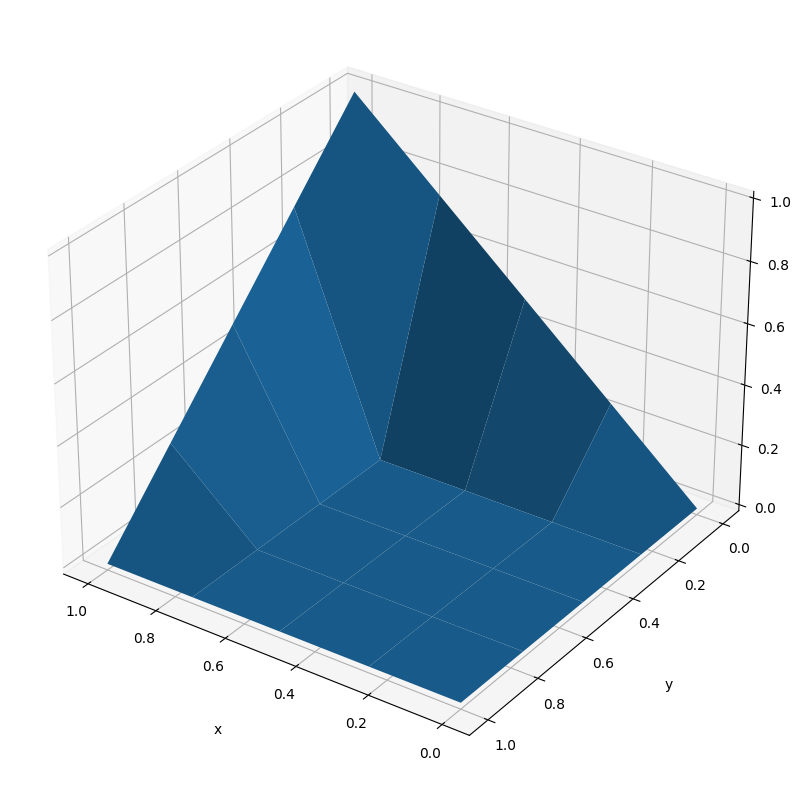

In [ ]:
V1=relax(V)

fig = plt.figure(figsize = (15,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(xv, yv, V)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('V', labelpad=20)
ax.view_init(30,125)

plt.show()

**Now create a while loop to find the potential that fits these boundary conditions.**

Converged in 1 iterations


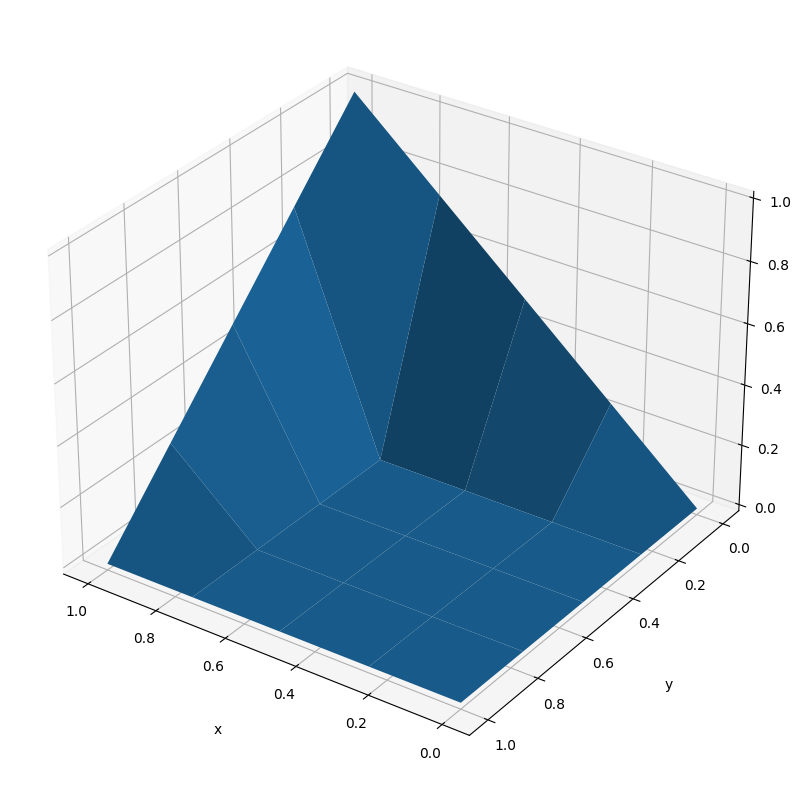

In [ ]:

# Initial relaxation
V = relax(V)

# Define convergence criteria
epsilon = 1e-5
max_iterations = 1000
iteration = 0

# Main while loop for relaxation until convergence
while True:
    V_old = V.copy()
    V = relax(V)
    iteration += 1
    if np.max(np.abs(V - V_old)) < epsilon or iteration >= max_iterations:
        break

print("Converged in", iteration, "iterations")

# Plot the final potential
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xv, yv, V)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('V', labelpad=20)
ax.view_init(30, 125)

plt.show()